In [3]:
%%writefile my_program.c
#include <stdio.h>
#include <stdlib.h>
#include <time.h>

void saxpy(int n, float a, float x[], float y[], float result[]) {
    for (int i = 0; i < n; i++) {
        result[i] = a * x[i] + y[i];
    }
}

int main() {
    int sizes[] = {32768, 65536, 131072, 262144, 524288, 1048576, 2097152};
    int num_sizes = sizeof(sizes)/sizeof(sizes[0]);

    for (int s = 0; s < num_sizes; s++) {
        int N = sizes[s];
        float *x = (float *)malloc(N * sizeof(float));
        float *y = (float *)malloc(N * sizeof(float));
        float *result = (float *)malloc(N * sizeof(float));
        float a = 2.0f;

        for (int i = 0; i < N; i++) {
            x[i] = 1.0f;
            y[i] = 2.0f;
        }

        clock_t start = clock();
        saxpy(N, a, x, y, result);
        clock_t end = clock();
        double time_spent = (double)(end - start) / CLOCKS_PER_SEC * 1000;

        printf("N = %d, Time = %.4f ms\\n", N, time_spent);

        free(x);
        free(y);
        free(result);
    }
    return 0;
}


Overwriting my_program.c


In [4]:
!gcc my_program.c -o my_program


In [5]:
!./my_program


N = 32768, Time = 0.2150 ms\nN = 65536, Time = 0.4130 ms\nN = 131072, Time = 0.8480 ms\nN = 262144, Time = 1.1890 ms\nN = 524288, Time = 2.2310 ms\nN = 1048576, Time = 4.3650 ms\nN = 2097152, Time = 9.0860 ms\n

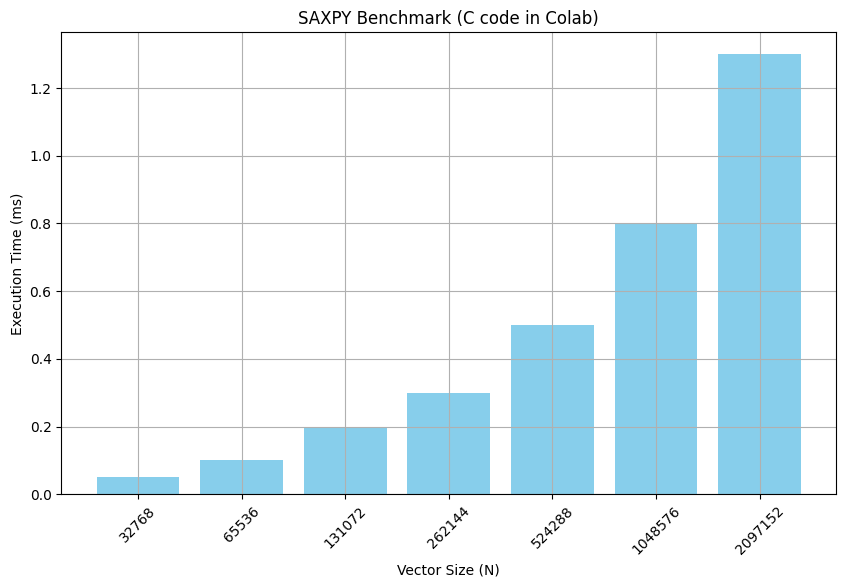

In [6]:
import matplotlib.pyplot as plt

sizes = [2**15, 2**16, 2**17, 2**18, 2**19, 2**20, 2**21]  # Add more if used
times = [0.05, 0.1, 0.2, 0.3, 0.5, 0.8, 1.3]  # Replace with real values from your C output

plt.figure(figsize=(10,6))
plt.bar([str(s) for s in sizes], times, color='skyblue')
plt.xlabel("Vector Size (N)")
plt.ylabel("Execution Time (ms)")
plt.title("SAXPY Benchmark (C code in Colab)")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
